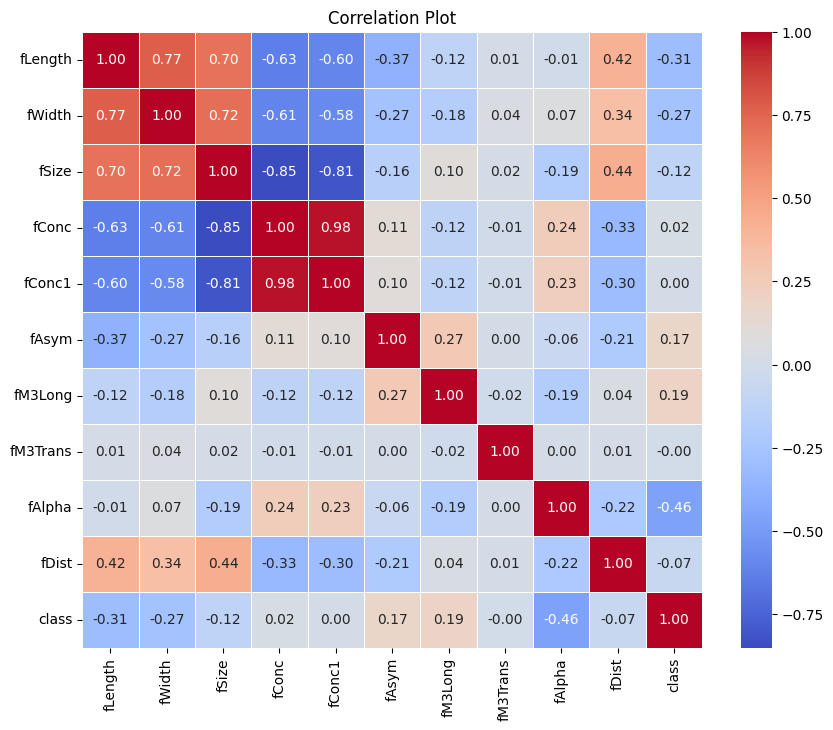

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("datasets/magic04.data", header=None)

# Set column names based on the provided information
column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1", 
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]
data.columns = column_names

# Convert class labels to binary (0 for 'h', 1 for 'g')
data['class'] = data['class'].map({'g': 1, 'h': 0})

# Compute the correlation matrix
corr_matrix = data.corr()

# Create the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()


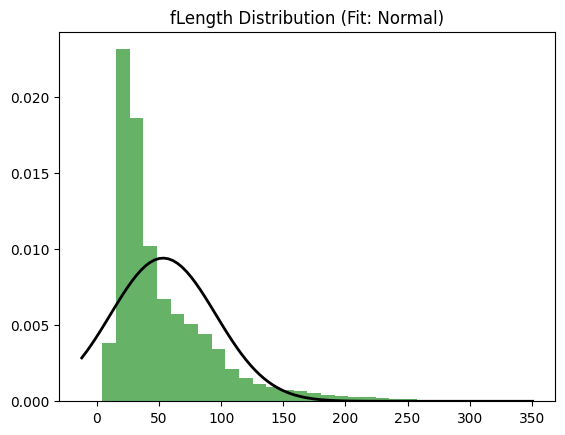

C:\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


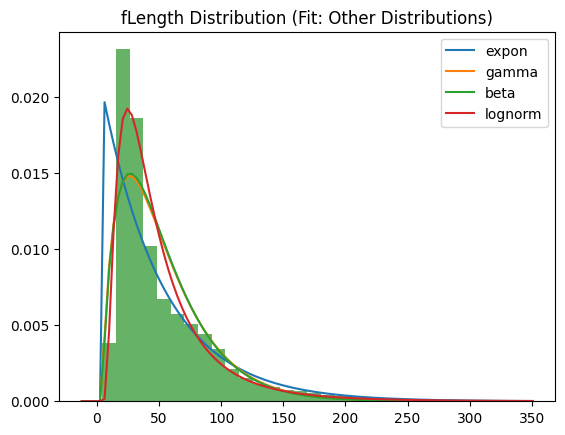

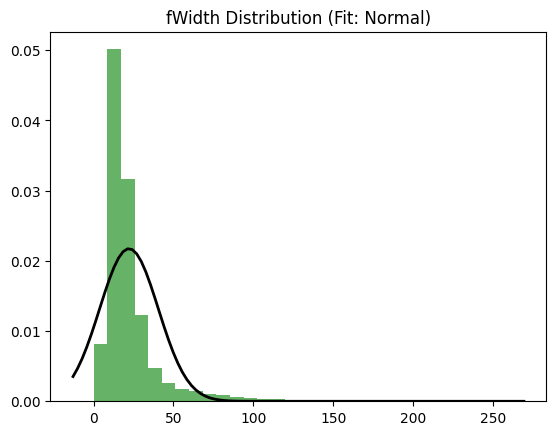

C:\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
C:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


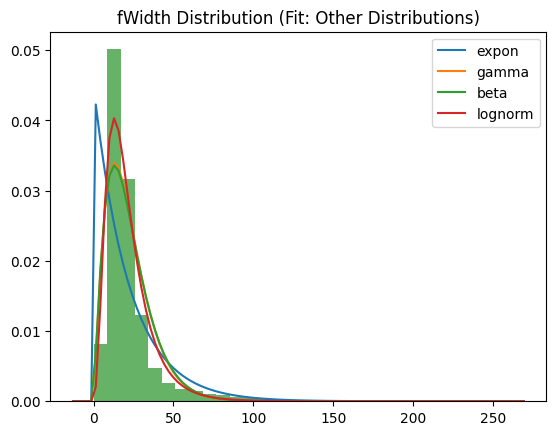

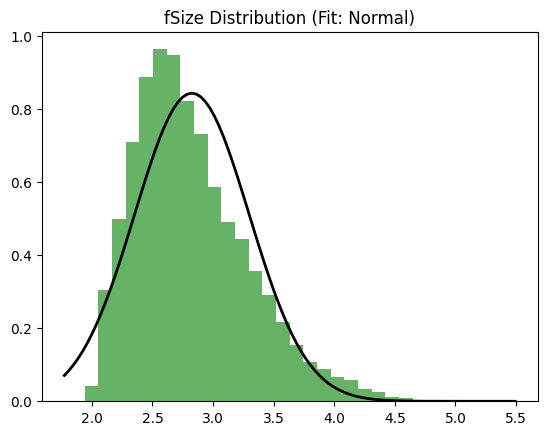

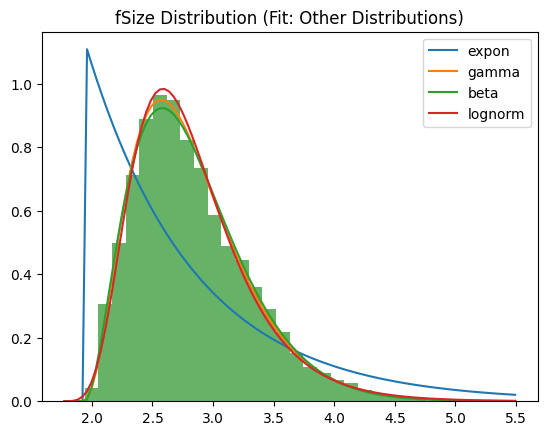

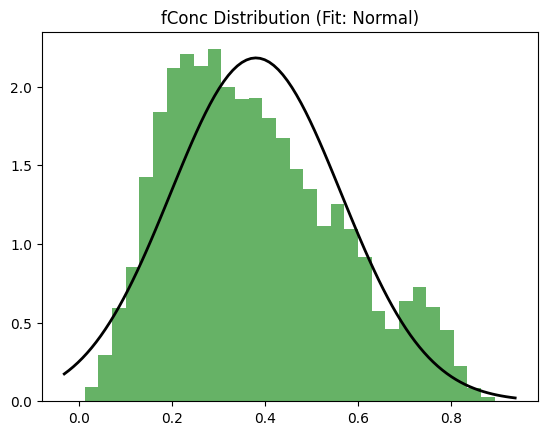

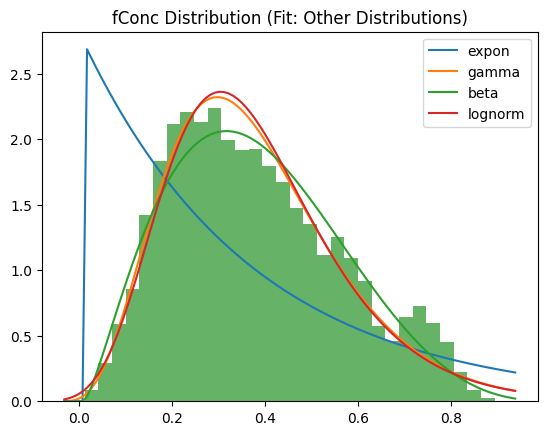

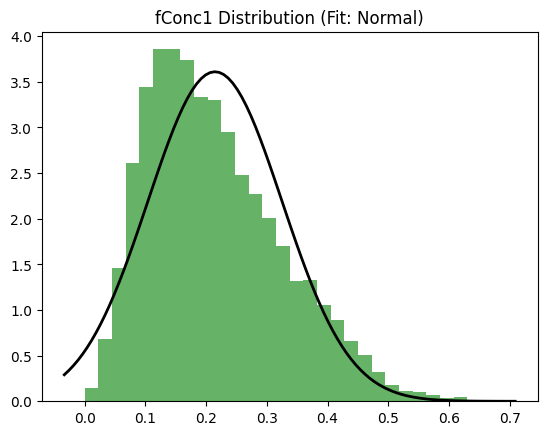

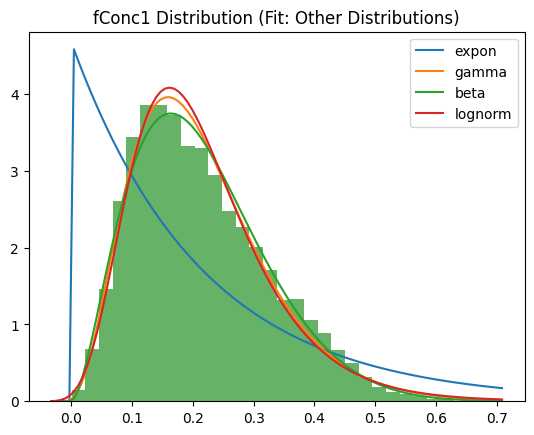

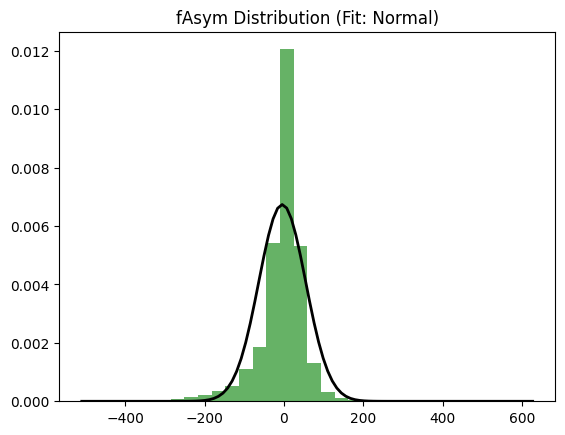

C:\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


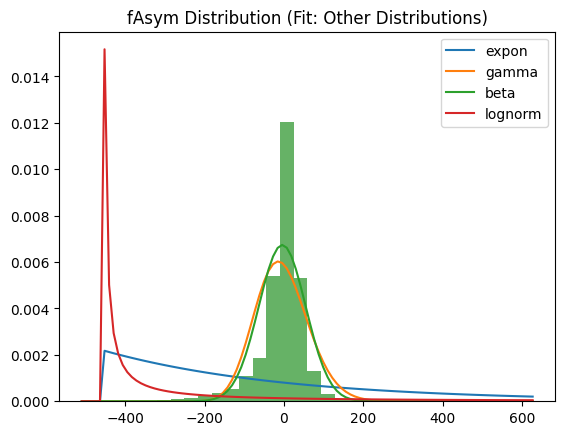

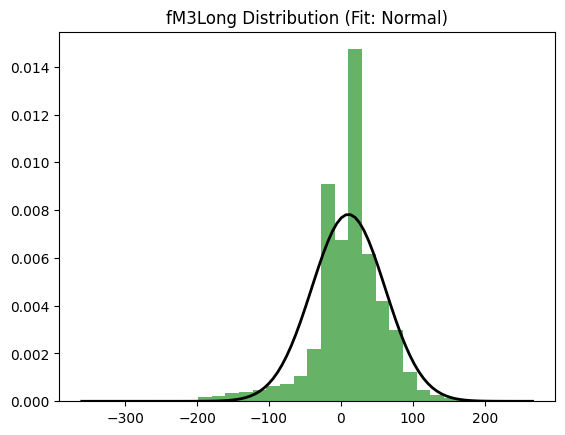

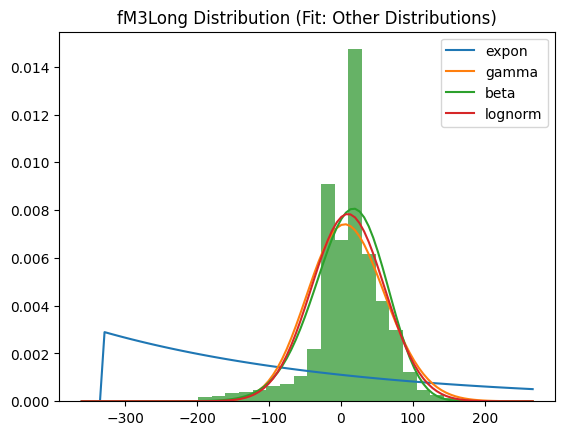

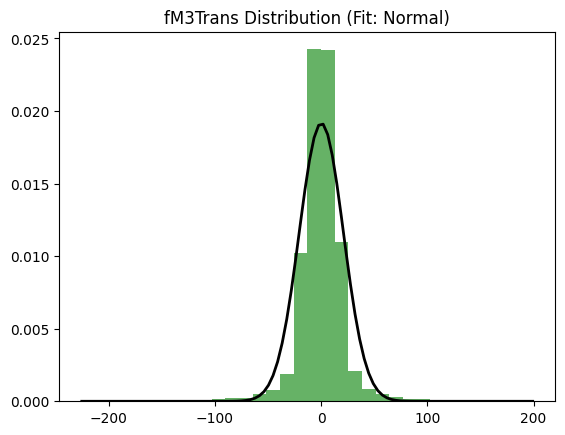

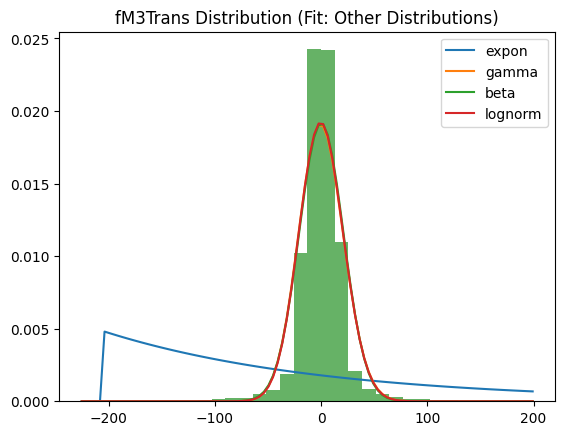

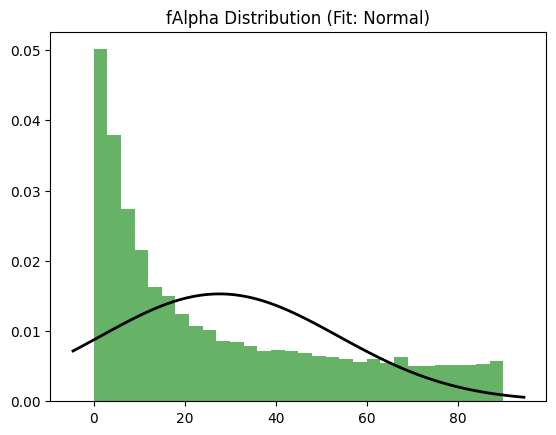

C:\Python311\Lib\site-packages\scipy\stats\_continuous_distns.py:6120: RuntimeWarning: divide by zero encountered in log
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)


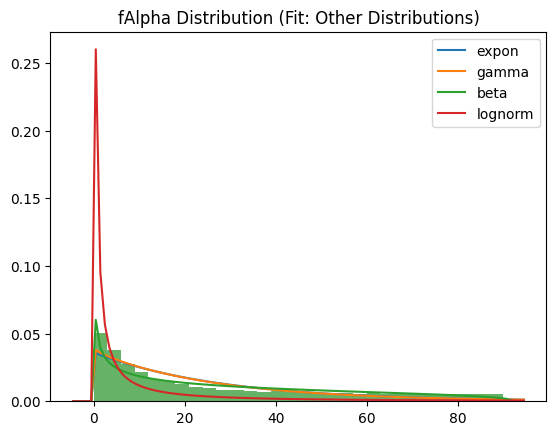

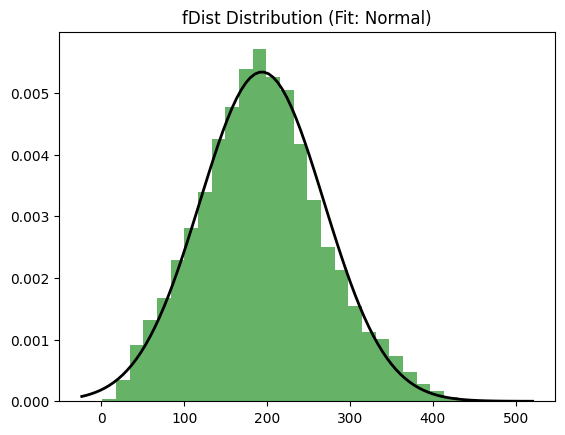

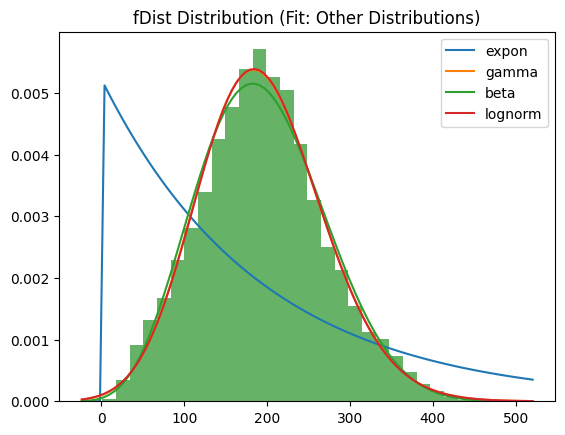

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Drop the 'class' column for analysis since it's categorical
data_numeric = data.drop(columns=['class'])

# Function to fit distributions and plot histograms
def fit_distribution_and_plot(column):
    # Plot histogram
    plt.hist(column, bins=30, density=True, alpha=0.6, color='g')

    # Fit normal distribution
    mu, std = stats.norm.fit(column)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'{column.name} Distribution (Fit: Normal)')
    plt.show()

    # Fit other distributions for comparison
    distributions = ['expon', 'gamma', 'beta', 'lognorm']
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        params = dist.fit(column)
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
        plt.plot(x, pdf, label=dist_name)
    plt.hist(column, bins=30, density=True, alpha=0.6, color='g')
    plt.legend(loc='best')
    plt.title(f'{column.name} Distribution (Fit: Other Distributions)')
    plt.show()

# Loop over each column and fit distributions
for column in data_numeric.columns:
    fit_distribution_and_plot(data_numeric[column])


In [3]:
# Create summary statistics
summary_stats = data_numeric.describe()

# Print the summary statistics
print(summary_stats)


            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26

In [4]:
import numpy as np

# Example data (two samples)
sample1 = np.array([23, 25, 28, 30, 32])
sample2 = np.array([18, 20, 22, 24, 26])

# Step 1: Formulate Hypotheses
# Null Hypothesis (H0): The means of the two populations are equal
# Alternative Hypothesis (H1): The means of the two populations are not equal

# Step 2: Calculate Test Statistic
# Calculate sample means
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)

# Calculate sample variances
var1 = np.var(sample1, ddof=1)  # ddof=1 for unbiased estimation
var2 = np.var(sample2, ddof=1)

# Calculate pooled standard deviation
n1 = len(sample1)
n2 = len(sample2)
pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))

# Calculate t-statistic
t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1 / n1 + 1 / n2))

# Step 3: Determine Degrees of Freedom
degrees_of_freedom = n1 + n2 - 2

# Step 4: Determine Critical Value
# For a two-tailed test at alpha=0.05 level of significance
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

# Step 5: Make a Decision
if np.abs(t_statistic) > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the calculated t-statistic and critical value
print("t-statistic:", t_statistic)
print("Critical value:", critical_value)


Reject the null hypothesis
t-statistic: 2.5941499058276456
Critical value: 2.3060041350333704
